#### Schätzergebnisse visualisieren

In [1]:
# Notwendige Bibliotheken importieren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Laden der Ergebnisse für die Truncation Methode
trunc_A = pd.read_csv('Code/Simulationen mit DGP2/Random Forest als Outcome-Modell/Ergebnisse/results_trunc_A_RF.csv')
trunc_E = pd.read_csv('Code/Simulationen mit DGP2/Random Forest als Outcome-Modell/Ergebnisse/results_trunc_E_RF.csv')
trunc_G = pd.read_csv('Code/Simulationen mit DGP2/Random Forest als Outcome-Modell/Ergebnisse/results_trunc_G_RF.csv')
# Laden der Ergebnisse für die Discarding Methode
disc_A = pd.read_csv('Code/Simulationen mit DGP2/Random Forest als Outcome-Modell/Ergebnisse/results_disc_A_RF.csv')
disc_E = pd.read_csv('Code/Simulationen mit DGP2/Random Forest als Outcome-Modell/Ergebnisse/results_disc_E_RF.csv')
disc_G = pd.read_csv('Code/Simulationen mit DGP2/Random Forest als Outcome-Modell/Ergebnisse/results_disc_G_RF.csv')

# Zusammenführen der Ergebnisse
results_trunc = pd.concat([trunc_A, trunc_E, trunc_G], ignore_index=True)
results_disc = pd.concat([disc_A, disc_E, disc_G], ignore_index=True)

#### Truncation

In [3]:
# Die mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage für verschiedene Schwellenwerte speichern
result_trunc3 = []
learner_list = ['LogisticRegressionCV()', 'RandomForestClassifier()', 'GradientBoostingClassifier()']
scenario_list = ['A', 'E', 'G']
# Ergebnisse für die Truncation Methode für verschiedene Szenarien berechnen und speichern
for scenario in scenario_list:
    result_scnr = results_trunc[results_trunc.scenario == scenario]
    for learner in learner_list:
        res = result_scnr[result_scnr.learner == learner]
        for trim_value in [0.001, 0.01, 0.05, 0.1]:
            # Durchschnittlichen Anteil der getrimmten Beobachtungen berechnen
            mean_share_trim_top = res.loc[res['trim_value'] == trim_value, 'share_trimmed_top'].mean()
            mean_share_trim_bottom  = res.loc[res['trim_value'] == trim_value, 'share_trimmed_bottom'].mean()             
            mean_share_trim_orcl_top = res.loc[res.trim_value == trim_value, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = res.loc[res.trim_value == trim_value, 'share_trim_orcl_bottom'].mean()  
            # Durchschnittlichen Anteil der behandelten Beobachtungen berechnen
            mean_share_treated = res.loc[res['trim_value'] == trim_value, 'share_treated'].mean()
            # Mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage berechnen
            mean_abs_bias = res.loc[res['trim_value'] == trim_value, 'abs_bias'].mean()
            mean_std_err = res.loc[res['trim_value'] == trim_value, 'std err'].mean()
            var = res.loc[res['trim_value'] == trim_value, 'coef'].var()
            mse = (res.loc[res['trim_value'] == trim_value, 'bias'].pow(2)).mean()
            cov = res.loc[res['trim_value'] == trim_value, 'in_ci'].mean()
            # Umbenennung der Spaltenwerte
            if learner == 'LogisticRegressionCV()':
                methods = 'Linear + Logit'
            elif learner == 'RandomForestClassifier()':
                methods = 'Linear + RF'
            else:
                methods = 'Linear + GBoost'
            rows = {
                'scenario': scenario,
                'learner': methods + ' Truncation',
                'trim_value': trim_value,
                'mean_share_trim_top' : mean_share_trim_top,
                'mean_share_trim_bottom': mean_share_trim_bottom,
                'mean_share_trim': mean_share_trim_top + mean_share_trim_bottom,               
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_share_treated': mean_share_treated,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': res.loc[res['trim_value'] == trim_value, 'loss_g0'].mean(),
                'mean_loss_g1': res.loc[res['trim_value'] == trim_value, 'loss_g1'].mean(),
                'mean_loss_m': res.loc[res['trim_value'] == trim_value, 'loss_m'].mean()
            }
            result_trunc3.append(rows)
df_trunc = pd.DataFrame(result_trunc3)

In [4]:
# Aufrunden der Ergebnisse für die Truncation Methode
df_trunc_round = df_trunc.round({'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl_top':2, 'mean_share_trim_orcl_bottom':2, 'mean_share_trim_orcl':2, 'mean_share_treated': 2, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

#### Discarding

In [5]:
# Die mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage für verschiedene Schwellenwerte speichern
result_discard3 = []
# Ergebnisse für die Discarding Methode für verschiedene Szenarien berechnen und speichern
for scenario in scenario_list:
    result_scnr = results_disc[results_disc.scenario == scenario]
    for learner in learner_list:
        res = result_scnr[result_scnr.learner == learner]
        for trim_value in [0.001, 0.01, 0.05, 0.1]:
            # Durchschnittlichen Anteil der discarded Beobachtungen berechnen
            mean_share_trim_top = res.loc[res['trim_value'] == trim_value, 'share_trimmed_top'].mean()
            mean_share_trim_bottom  = res.loc[res['trim_value'] == trim_value, 'share_trimmed_bottom'].mean()
            mean_share_trim_orcl_top = res.loc[res.trim_value == trim_value, 'share_trim_orcl_top'].mean()
            mean_share_trim_orcl_bottom = res.loc[res.trim_value == trim_value, 'share_trim_orcl_bottom'].mean() 
            # Durchschnittlichen Anteil der behandelten Beobachtungen berechnen
            mean_share_treated_pop = res.loc[res['trim_value'] == trim_value, 'share_treated_pop'].mean()
            mean_share_treated_sample = res.loc[res['trim_value'] == trim_value, 'share_treated_sample'].mean()
            # Mittlere absolute Verzerrung, Varianz des Schätzers, MSE und Coverage berechnen
            mean_abs_bias = res.loc[res['trim_value'] == trim_value, 'abs_bias'].mean()
            mean_std_err = res.loc[res['trim_value'] == trim_value, 'std err'].mean()
            var = res.loc[res['trim_value'] == trim_value, 'coef'].var()
            mse = (res.loc[res['trim_value'] == trim_value, 'bias'].pow(2)).mean()
            cov = res.loc[res['trim_value'] == trim_value, 'in_ci'].mean()
            # Umbenennung der Spaltenwerte
            if learner == 'LogisticRegressionCV()':
                methods = 'Linear + Logit'
            elif learner == 'RandomForestClassifier()':
                methods = 'Linear + RF'
            else:
                methods = 'Linear + GBoost'
            rows = {                      
                'scenario': scenario,          
                'learner': methods + ' Discarding',
                'trim_value': trim_value,
                'mean_share_trim_top' : mean_share_trim_top,
                'mean_share_trim_bottom': mean_share_trim_bottom,
                'mean_share_trim': mean_share_trim_top + mean_share_trim_bottom,
                'mean_share_trim_orcl_top': mean_share_trim_orcl_top,
                'mean_share_trim_orcl_bottom': mean_share_trim_orcl_bottom,
                'mean_share_trim_orcl': mean_share_trim_orcl_top + mean_share_trim_orcl_bottom,
                'mean_share_treated_pop': mean_share_treated_pop,
                'mean_share_treated_sample': mean_share_treated_sample,
                'mean_abs_bias': mean_abs_bias,
                'mean_std_err': mean_std_err,
                'var': var,
                'MSE': mse,
                'coverage': cov,
                'mean_loss_g0': res.loc[res['trim_value'] == trim_value, 'loss_g0'].mean(),
                'mean_loss_g1': res.loc[res['trim_value'] == trim_value, 'loss_g1'].mean(),
                'mean_loss_m': res.loc[res['trim_value'] == trim_value, 'loss_m'].mean()
            }
            rows
            result_discard3.append(rows)
df_disc= pd.DataFrame(result_discard3)

In [6]:
# Aufrunden der Ergebnisse für die Discarding Methode
df_disc_round = df_disc.round({'mean_share_trim_top': 2, 'mean_share_trim_bottom': 2, 'mean_share_trim': 2, 'mean_share_trim_orcl_top': 2,'mean_share_trim_orcl_bottom': 2,'mean_share_trim_orcl': 2, 'mean_share_treated_pop': 2, 'mean_share_treated_sample': 2, 'mean_abs_bias': 4, 'mean_std_err': 4, 'var': 4, 'MSE': 4, 'coverage': 4, 'mean_loss_g0': 4, 'mean_loss_g1': 4, 'mean_loss_m': 4})

#### Ergebnisse visualisieren

In [7]:
# Wegen identischer Werte für ml_g1 und ml_g0 mit RF und GradBoost, werden Werte mit RF leicht verschoben
df_trunc.loc[df_trunc.learner == 'Linear + GBoost Truncation', 'mean_loss_g1'] += 0.00015
df_trunc.loc[df_trunc.learner == 'Linear + GBoost Truncation', 'mean_loss_g0'] += 0.00015

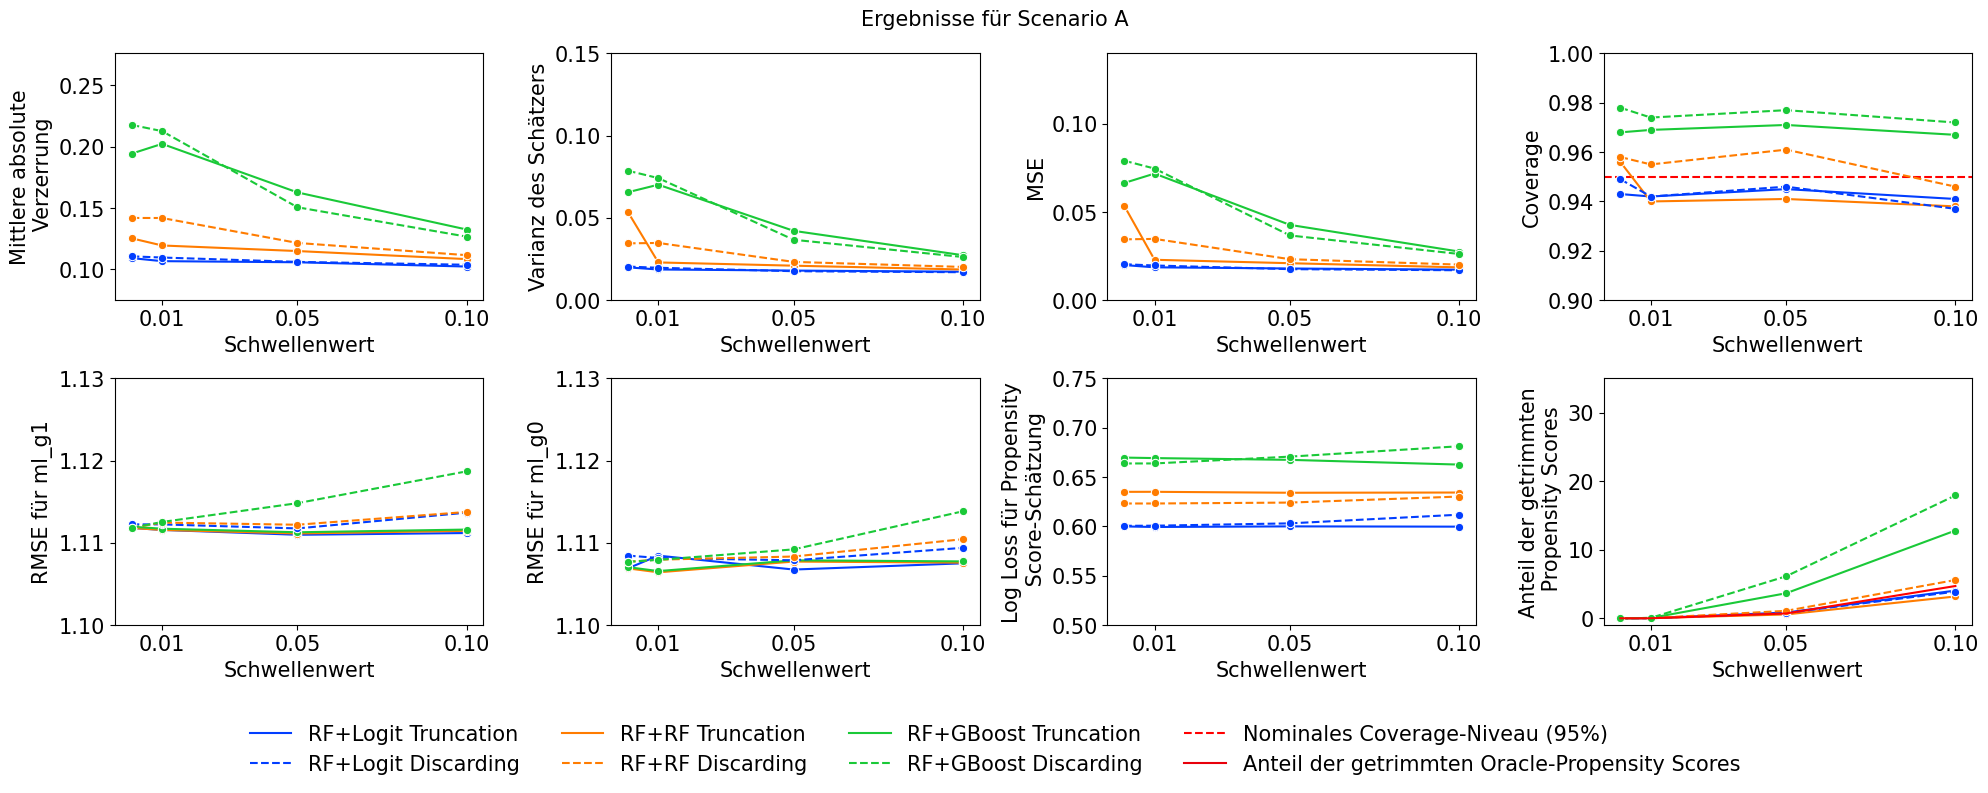

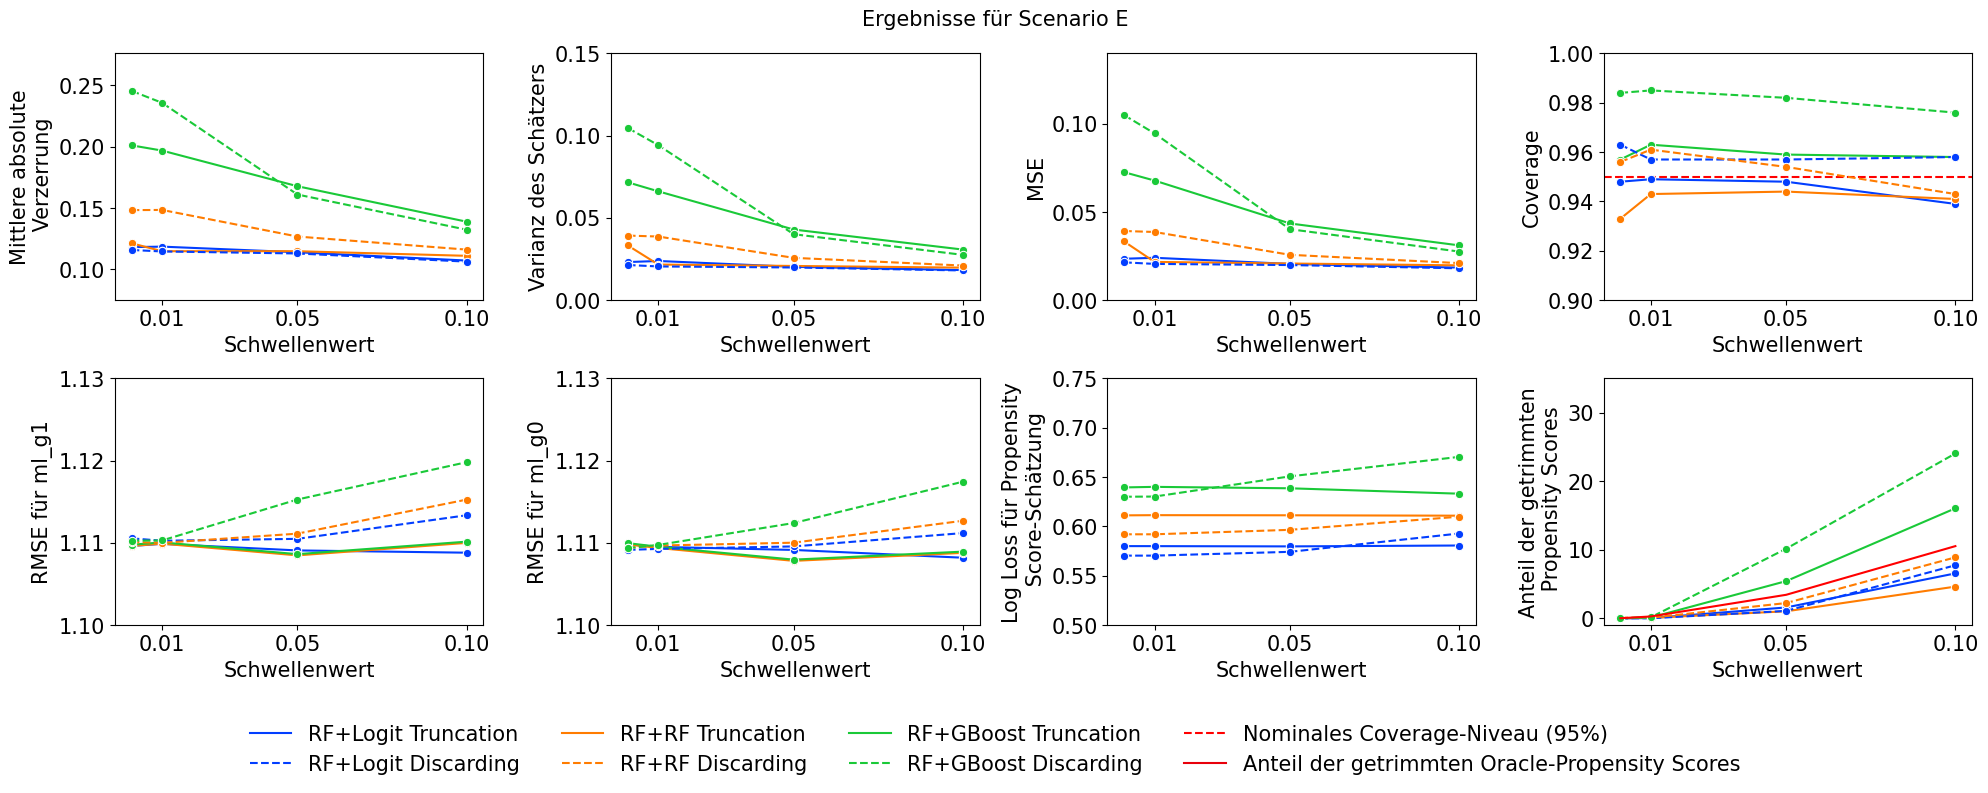

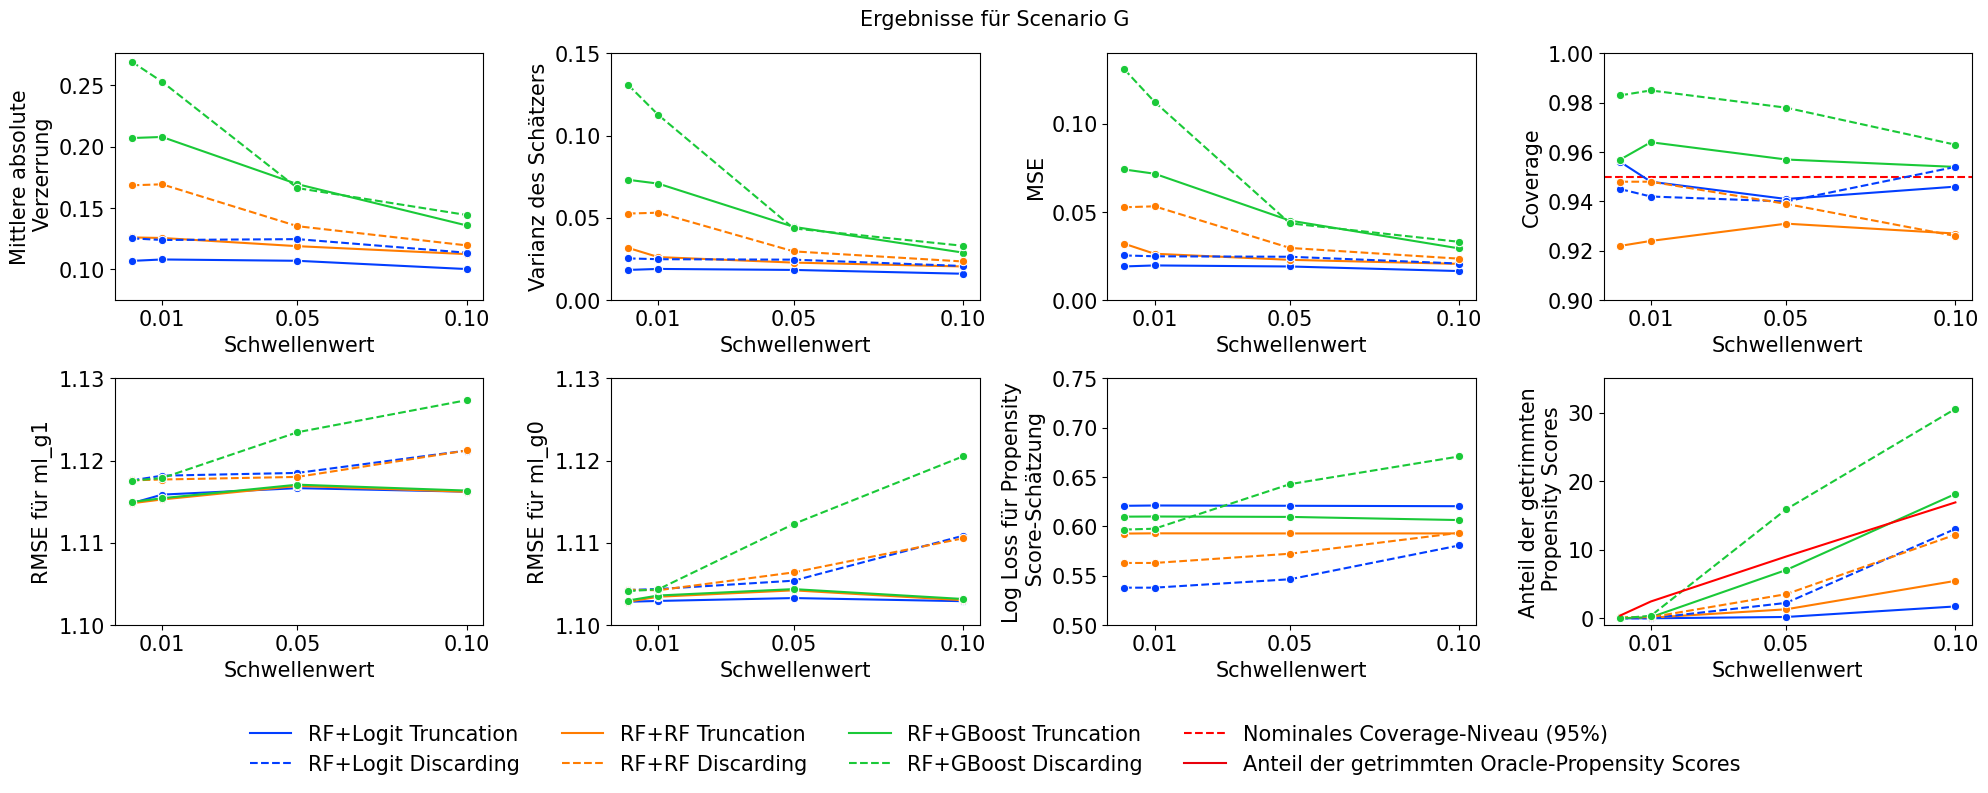

In [17]:
# plotten die durchschnittliche absolute Verzerrung, Varianz, MSE und Coverage für verschiedene Trimmwerte und Lernverfahren
for scenario in scenario_list:
    df_trunc_scnr = df_trunc[df_trunc['scenario'] == scenario]
    df_discard_scnr = df_disc[df_disc['scenario'] == scenario]
    fig, ax = plt.subplots(2, 4, figsize=(20, 7))
    axes = ax.flatten()

    # Schriftgröße für die Achsenbeschriftung
    for a in axes:
        a.tick_params(axis='both', labelsize=15)
        xticks = [0.01, 0.05, 0.1]
        a.set_xticks(xticks)

    # Plot der mittleren absoluten Verzerrung
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_trunc_scnr, ax=axes[0], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_abs_bias', hue='learner', data=df_discard_scnr, ax=axes[0], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[0].set_xlabel('Schwellenwert', fontsize=15)
    axes[0].set_ylabel('Mittlere absolute\n Verzerrung', fontsize=15)
    axes[0].set_ylim(0.075, 0.276)
    
    # Plot der Varianz des Schätzers
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_trunc_scnr, ax=axes[1], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='var', hue='learner', data=df_discard_scnr, ax=axes[1], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[1].set_xlabel('Schwellenwert', fontsize=15)
    axes[1].set_ylabel('Varianz des Schätzers', fontsize=15)
    axes[1].set_ylim(0.0, 0.15)
    
    # MSE
    sns.lineplot(x='trim_value', y='MSE', data=df_trunc_scnr, hue='learner', ax=axes[2], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='MSE', data=df_discard_scnr, hue='learner', ax=axes[2], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[3].axhline(y=0.95, color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)')
    axes[2].set_xlabel('Schwellenwert', fontsize=15)
    axes[2].set_ylabel('MSE', fontsize=15)
    axes[2].set_ylim(0.0, 0.14)
    
    # Coverage
    sns.lineplot(x='trim_value', y='coverage', data=df_trunc_scnr, hue='learner', ax=axes[3], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='coverage', data=df_discard_scnr, hue='learner', ax=axes[3], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[3].set_xlabel('Schwellenwert', fontsize=15)
    axes[3].set_ylabel('Coverage', fontsize=15)
    axes[3].set_ylim(0.90, 1.0)
    
    # Durchschnittlicher Verlust für die Behandlungsgruppe ml_g1
    sns.lineplot(x='trim_value', y='mean_loss_g0', data=df_trunc_scnr, hue='learner', ax=axes[4], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g0', data=df_discard_scnr, hue='learner', ax=axes[4], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[4].set_xlabel('Schwellenwert', fontsize=15)
    axes[4].set_ylabel('RMSE für ml_g1', fontsize=15)
    axes[4].set_ylim(1.10, 1.13)
    
    # Durchschnittlicher Verlust für die Kontrollgruppe ml_g0
    sns.lineplot(x='trim_value', y='mean_loss_g1', data=df_trunc_scnr, hue='learner', ax=axes[5], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_g1', data=df_discard_scnr, hue='learner', ax=axes[5], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[5].set_xlabel('Schwellenwert', fontsize=15)
    axes[5].set_ylabel('RMSE für ml_g0', fontsize=15)
    axes[5].set_ylim(1.10, 1.13)
    
    # Durchschnittlicher Log Loss für die PS Schätzung
    sns.lineplot(x='trim_value', y='mean_loss_m', data=df_trunc_scnr, hue='learner', ax=axes[6], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_loss_m', data=df_discard_scnr, hue='learner', ax=axes[6], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[6].set_xlabel('Schwellenwert', fontsize=15)
    axes[6].set_ylabel('Log Loss für Propensity\n Score-Schätzung', fontsize=15)
    axes[6].set_ylim(0.5, 0.75)
    
    # Durchschnittliche Anteil der getrimmten PS Werte/Beobachtungen
    g=sns.lineplot(x='trim_value', y='mean_share_trim', data=df_trunc_scnr, hue='learner', ax=axes[7], marker='o', palette='bright', legend=False)
    sns.lineplot(x='trim_value', y='mean_share_trim', data=df_discard_scnr, hue='learner', ax=axes[7], marker='o', palette='bright', linestyle='dashed', legend=False)
    axes[7].plot(df_trunc_scnr.loc[df_trunc_scnr.learner == 'Linear + Logit Truncation']['trim_value'].iloc[0:4], df_trunc_scnr.loc[df_trunc_scnr.learner == 'Linear + Logit Truncation']['mean_share_trim_orcl'].iloc[0:4], linestyle='-', color='red')
    axes[7].set_xlabel('Schwellenwert', fontsize=15)
    axes[7].set_ylabel('Anteil der getrimmten\n Propensity Scores', fontsize=15)
    axes[7].set_ylim(-1, 35)
    
    # Farben aus der 'bright'-Palette extrahieren
    colors = sns.color_palette('bright')

    # Manuelle Legende mit durchgezogenen und gestrichelten Linien
    handles = [
        Line2D([0], [0], color=colors[0], linestyle='-', label='RF+Logit Truncation'),
        Line2D([0], [0], color=colors[0], linestyle='--', label='RF+Logit Discarding'),
        Line2D([0], [0], color=colors[1], linestyle='-', label='RF+RF Truncation'),
        Line2D([0], [0], color=colors[1], linestyle='--', label='RF+RF Discarding'),
        Line2D([0], [0], color=colors[2], linestyle='-', label='RF+GBoost Truncation'),
        Line2D([0], [0], color=colors[2], linestyle='--', label='RF+GBoost Discarding'),
        Line2D([0], [0], color='red', linestyle='--', label='Nominales Coverage-Niveau (95%)'),
        Line2D([0], [0], color=colors[3], linestyle='-', label='Anteil der getrimmten Oracle-Propensity Scores')] 
    
    # Legende korrekt platzieren
    fig.legend(handles=handles, loc='lower center', fontsize=15, bbox_to_anchor=(0.5, -0.14), ncols=4, frameon=False)
    fig.suptitle(f'Ergebnisse für Scenario {scenario}', fontsize=15)
    fig .tight_layout()

In [9]:
# Ergebnisse für die Truncation Methode für das Szenario A anzeigen
df_trunc_round[df_trunc_round['scenario'] == 'A'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,A,Linear + Logit Truncation,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,0.1092,0.1353,0.0199,0.0199,0.943,1.1118,1.1069,0.6000
1,A,Linear + Logit Truncation,0.010,0.01,0.00,0.01,0.00,0.00,0.00,51.07,0.1068,0.1344,0.0186,0.0186,0.942,1.1116,1.1084,0.5995
2,A,Linear + Logit Truncation,0.050,0.48,0.36,0.84,0.41,0.30,0.70,51.07,0.1059,0.1319,0.0180,0.0180,0.945,1.1110,1.1068,0.6001
3,A,Linear + Logit Truncation,0.100,2.25,1.79,4.04,2.62,2.08,4.71,51.07,0.1024,0.1258,0.0173,0.0173,0.941,1.1112,1.1075,0.5998
4,A,Linear + RF Truncation,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,0.1254,0.1510,0.0536,0.0537,0.956,1.1118,1.1069,0.6351
5,A,Linear + RF Truncation,0.010,0.01,0.01,0.02,0.00,0.00,0.00,51.07,0.1195,0.1438,0.0229,0.0229,0.940,1.1116,1.1064,0.6351
6,A,Linear + RF Truncation,0.050,0.32,0.24,0.56,0.41,0.30,0.70,51.07,0.1150,0.1394,0.0209,0.0210,0.941,1.1111,1.1077,0.6341
7,A,Linear + RF Truncation,0.100,1.81,1.37,3.18,2.62,2.08,4.71,51.07,0.1084,0.1339,0.0186,0.0186,0.938,1.1115,1.1076,0.6344
8,A,Linear + GBoost Truncation,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,0.1943,0.2517,0.0656,0.0665,0.968,1.1118,1.1069,0.6698
9,A,Linear + GBoost Truncation,0.010,0.03,0.02,0.05,0.00,0.00,0.00,51.07,0.2023,0.2536,0.0702,0.0718,0.969,1.1116,1.1064,0.6693


In [10]:
# Ergebnisse für die Truncation Methode für das Szenario E anzeigen
df_trunc_round[df_trunc_round['scenario'] == 'E'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,E,Linear + Logit Truncation,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,0.1182,0.1487,0.0231,0.0235,0.948,1.1096,1.1098,0.5801
1,E,Linear + Logit Truncation,0.010,0.01,0.02,0.03,0.00,0.26,0.26,46.91,0.1186,0.1486,0.0238,0.0240,0.949,1.1099,1.1095,0.5801
2,E,Linear + Logit Truncation,0.050,0.53,1.05,1.58,0.52,2.90,3.43,46.91,0.1140,0.1421,0.0203,0.0205,0.948,1.1091,1.1091,0.5798
3,E,Linear + Logit Truncation,0.100,2.38,4.17,6.55,2.98,7.55,10.53,46.91,0.1072,0.1342,0.0183,0.0185,0.939,1.1088,1.1082,0.5807
4,E,Linear + RF Truncation,0.001,0.00,0.01,0.02,0.00,0.01,0.01,46.91,0.1213,0.1445,0.0332,0.0333,0.933,1.1096,1.1098,0.6112
5,E,Linear + RF Truncation,0.010,0.01,0.05,0.07,0.00,0.26,0.26,46.91,0.1149,0.1397,0.0216,0.0217,0.943,1.1099,1.1094,0.6114
6,E,Linear + RF Truncation,0.050,0.25,0.77,1.02,0.52,2.90,3.43,46.91,0.1149,0.1375,0.0208,0.0208,0.944,1.1085,1.1078,0.6113
7,E,Linear + RF Truncation,0.100,1.41,3.21,4.62,2.98,7.55,10.53,46.91,0.1111,0.1326,0.0198,0.0197,0.941,1.1100,1.1088,0.6109
8,E,Linear + GBoost Truncation,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,0.2011,0.2493,0.0716,0.0726,0.957,1.1096,1.1098,0.6396
9,E,Linear + GBoost Truncation,0.010,0.02,0.09,0.11,0.00,0.26,0.26,46.91,0.1968,0.2456,0.0661,0.0679,0.963,1.1099,1.1094,0.6401


In [11]:
# Ergebnisse für die Truncation Methode für das Szenario G anzeigen
df_trunc_round[df_trunc_round['scenario'] == 'G'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,G,Linear + Logit Truncation,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,0.1070,0.1336,0.0184,0.0191,0.956,1.1148,1.1028,0.6209
1,G,Linear + Logit Truncation,0.010,0.00,0.00,0.00,1.69,0.76,2.45,54.49,0.1081,0.1338,0.0190,0.0197,0.948,1.1159,1.1029,0.6212
2,G,Linear + Logit Truncation,0.050,0.16,0.03,0.19,5.68,3.33,9.01,54.49,0.1071,0.1312,0.0184,0.0191,0.941,1.1167,1.1033,0.6209
3,G,Linear + Logit Truncation,0.100,1.34,0.39,1.73,10.36,6.55,16.91,54.49,0.1003,0.1256,0.0160,0.0165,0.946,1.1162,1.1029,0.6205
4,G,Linear + RF Truncation,0.001,0.01,0.01,0.02,0.32,0.09,0.41,54.49,0.1261,0.1450,0.0318,0.0320,0.922,1.1148,1.1028,0.5928
5,G,Linear + RF Truncation,0.010,0.07,0.03,0.10,1.69,0.76,2.45,54.49,0.1256,0.1434,0.0262,0.0263,0.924,1.1153,1.1035,0.5930
6,G,Linear + RF Truncation,0.050,0.92,0.39,1.31,5.68,3.33,9.01,54.49,0.1190,0.1376,0.0228,0.0229,0.931,1.1169,1.1042,0.5929
7,G,Linear + RF Truncation,0.100,3.76,1.70,5.46,10.36,6.55,16.91,54.49,0.1125,0.1296,0.0205,0.0206,0.927,1.1162,1.1030,0.5929
8,G,Linear + GBoost Truncation,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,0.2071,0.2550,0.0732,0.0742,0.957,1.1148,1.1028,0.6099
9,G,Linear + GBoost Truncation,0.010,0.10,0.06,0.15,1.69,0.76,2.45,54.49,0.2079,0.2532,0.0708,0.0717,0.964,1.1153,1.1035,0.6101


In [12]:
# Ergebnisse für die Discarding Methode für das Szenario A anzeigen
df_disc_round[df_disc_round['scenario'] == 'A'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated_pop,mean_share_treated_sample,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,A,Linear + Logit Discarding,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,51.07,0.1107,0.1351,0.0204,0.0204,0.949,1.1123,1.1085,0.6007
1,A,Linear + Logit Discarding,0.010,0.02,0.01,0.03,0.00,0.00,0.00,51.07,51.07,0.1097,0.1344,0.0197,0.0197,0.942,1.1122,1.1082,0.6008
2,A,Linear + Logit Discarding,0.050,0.44,0.33,0.77,0.41,0.30,0.70,51.07,51.03,0.1062,0.1292,0.0176,0.0176,0.946,1.1118,1.1079,0.6031
3,A,Linear + Logit Discarding,0.100,2.14,1.75,3.89,2.62,2.08,4.71,51.07,50.95,0.1038,0.1245,0.0170,0.0170,0.937,1.1137,1.1094,0.6119
4,A,Linear + RF Discarding,0.001,0.02,0.01,0.03,0.00,0.00,0.00,51.07,51.07,0.1420,0.1794,0.0345,0.0345,0.958,1.1118,1.1077,0.6233
5,A,Linear + RF Discarding,0.010,0.02,0.01,0.03,0.00,0.00,0.00,51.07,51.07,0.1419,0.1791,0.0348,0.0347,0.955,1.1125,1.1080,0.6233
6,A,Linear + RF Discarding,0.050,0.62,0.47,1.09,0.41,0.30,0.70,51.07,51.03,0.1216,0.1578,0.0233,0.0232,0.961,1.1122,1.1083,0.6242
7,A,Linear + RF Discarding,0.100,3.12,2.47,5.59,2.62,2.08,4.71,51.07,50.87,0.1116,0.1427,0.0202,0.0202,0.946,1.1138,1.1105,0.6303
8,A,Linear + GBoost Discarding,0.001,0.00,0.00,0.00,0.00,0.00,0.00,51.07,51.07,0.2178,0.2989,0.0787,0.0792,0.978,1.1118,1.1077,0.6638
9,A,Linear + GBoost Discarding,0.010,0.03,0.03,0.06,0.00,0.00,0.00,51.07,51.07,0.2127,0.2931,0.0742,0.0747,0.974,1.1125,1.1079,0.6638


In [13]:
# Ergebnisse für die Discarding Methode für das Szenario E anzeigen
df_disc_round[df_disc_round['scenario'] == 'E'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated_pop,mean_share_treated_sample,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,E,Linear + Logit Discarding,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,46.91,0.1159,0.1490,0.0214,0.0214,0.963,1.1106,1.1092,0.5704
1,E,Linear + Logit Discarding,0.010,0.00,0.00,0.00,0.00,0.26,0.26,46.91,46.91,0.1147,0.1484,0.0205,0.0206,0.957,1.1103,1.1093,0.5704
2,E,Linear + Logit Discarding,0.050,0.31,0.76,1.08,0.52,2.90,3.43,46.91,47.09,0.1130,0.1461,0.0199,0.0199,0.957,1.1105,1.1096,0.5743
3,E,Linear + Logit Discarding,0.100,2.59,5.15,7.74,2.98,7.55,10.53,46.91,47.90,0.1064,0.1401,0.0180,0.0181,0.958,1.1134,1.1112,0.5929
4,E,Linear + RF Discarding,0.001,0.02,0.07,0.08,0.00,0.01,0.01,46.91,46.93,0.1483,0.1831,0.0392,0.0392,0.956,1.1101,1.1094,0.5921
5,E,Linear + RF Discarding,0.010,0.02,0.07,0.08,0.00,0.26,0.26,46.91,46.93,0.1485,0.1826,0.0387,0.0387,0.961,1.1100,1.1097,0.5921
6,E,Linear + RF Discarding,0.050,0.62,1.61,2.22,0.52,2.90,3.43,46.91,47.29,0.1268,0.1621,0.0257,0.0257,0.954,1.1111,1.1100,0.5966
7,E,Linear + RF Discarding,0.100,2.93,5.96,8.89,2.98,7.55,10.53,46.91,48.03,0.1162,0.1459,0.0210,0.0210,0.943,1.1153,1.1127,0.6099
8,E,Linear + GBoost Discarding,0.001,0.00,0.00,0.00,0.00,0.01,0.01,46.91,46.91,0.2455,0.3242,0.1047,0.1050,0.984,1.1103,1.1094,0.6301
9,E,Linear + GBoost Discarding,0.010,0.04,0.10,0.14,0.00,0.26,0.26,46.91,46.94,0.2358,0.3160,0.0942,0.0946,0.985,1.1103,1.1098,0.6303


In [14]:
# Ergebnisse für die Discarding Methode für das Szenario G anzeigen
df_disc_round[df_disc_round['scenario'] == 'G'].reset_index(drop=True)

,scenario,learner,trim_value,mean_share_trim_top,mean_share_trim_bottom,mean_share_trim,mean_share_trim_orcl_top,mean_share_trim_orcl_bottom,mean_share_trim_orcl,mean_share_treated_pop,mean_share_treated_sample,mean_abs_bias,mean_std_err,var,MSE,coverage,mean_loss_g0,mean_loss_g1,mean_loss_m
0,G,Linear + Logit Discarding,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,54.49,0.1254,0.1581,0.0254,0.0254,0.945,1.1176,1.1043,0.5380
1,G,Linear + Logit Discarding,0.010,0.00,0.00,0.00,1.69,0.76,2.45,54.49,54.49,0.1240,0.1573,0.0249,0.0249,0.942,1.1182,1.1044,0.5380
2,G,Linear + Logit Discarding,0.050,1.44,0.80,2.25,5.68,3.33,9.01,54.49,54.29,0.1247,0.1556,0.0246,0.0246,0.940,1.1185,1.1054,0.5465
3,G,Linear + Logit Discarding,0.100,8.12,4.93,13.05,10.36,6.55,16.91,54.49,53.55,0.1136,0.1499,0.0208,0.0208,0.954,1.1212,1.1109,0.5807
4,G,Linear + RF Discarding,0.001,0.11,0.05,0.16,0.32,0.09,0.41,54.49,54.47,0.1686,0.2099,0.0526,0.0527,0.948,1.1176,1.1043,0.5630
5,G,Linear + RF Discarding,0.010,0.11,0.05,0.16,1.69,0.76,2.45,54.49,54.47,0.1694,0.2100,0.0532,0.0532,0.948,1.1177,1.1042,0.5630
6,G,Linear + RF Discarding,0.050,2.39,1.13,3.52,5.68,3.33,9.01,54.49,54.11,0.1352,0.1658,0.0296,0.0296,0.939,1.1180,1.1064,0.5724
7,G,Linear + RF Discarding,0.100,8.01,4.19,12.20,10.36,6.55,16.91,54.49,53.31,0.1196,0.1475,0.0235,0.0235,0.926,1.1212,1.1106,0.5935
8,G,Linear + GBoost Discarding,0.001,0.00,0.00,0.00,0.32,0.09,0.41,54.49,54.49,0.2693,0.3690,0.1311,0.1311,0.983,1.1176,1.1041,0.5969
9,G,Linear + GBoost Discarding,0.010,0.24,0.12,0.36,1.69,0.76,2.45,54.49,54.46,0.2529,0.3499,0.1126,0.1125,0.985,1.1179,1.1044,0.5977
